# Fake News Binary Classification

### [dataset](https://www.kaggle.com/datasets/aadyasingh55/fake-news-classification)

Author: [Kevin Thomas](mailto:ket189@pitt.edu)

License: [Apache 2.0](https://apache.org/licenses/LICENSE-2.0)

## **Executive Summary**

### **Objective**

This report presents the development and evaluation of a binary classification model designed to predict influenza cases (`is_influenza`) within Chicago’s healthcare data. Utilizing a comprehensive dataset spanning clinical visits from 2015 to 2025, the model aims to enhance early detection and resource allocation for influenza management.

### **Data Insights**

**1. Continuous Variables Analysis**
- **Week Distribution:** Data exhibits a uniform distribution across weeks, ensuring temporal coverage.
- **Percent Variable:** Heavily skewed towards lower values, indicating most observations have low percentage metrics.
- **Class Imbalance:** The target variable `is_influenza` is significantly imbalanced, with non-influenza cases predominating. This imbalance poses challenges for accurate prediction, potentially biasing the model towards non-influenza outcomes.

**2. Categorical Variables Analysis**
- **Seasonal Representation:** Data is primarily concentrated between 2019 and 2024, with sparse entries for the 2024-2025 season.
- **Visit Types:** Emergency Department (ED) visits dominate, while outpatient visits are infrequent.
- **Respiratory Categories:** Influenza, RSV, and COVID-19 are well-represented, reflecting prevalent respiratory conditions.
- **Demographics:** Balanced distribution across key demographic groups, particularly among individuals aged 65+, and various racial/ethnic categories.

**3. Advanced Visualizations**
- **Dodged Bar Charts & Heatmaps:** Highlight consistent high counts of Influenza and RSV, with notable COVID-19 spikes during 2020-2023. ED visits remain the primary mode of healthcare engagement, especially among older populations during pandemic periods.
- **Box and Violin Plots:** Reveal increased variability in the `percent` variable during pandemic years, with significant outliers in younger (0-4) and older (65+) age groups.
- **Correlation Analysis:** Minimal correlations between week, percent, and `is_influenza` (with a weak positive correlation of 0.21 between percent and `is_influenza`), indicating limited linear relationships among these variables.
- **Trend Analysis:** Demonstrates upward trends in percentage metrics over weeks, particularly in recent seasons, and consistent increases in ED visits across demographics.

### **Model Development and Selection**

**Model Evaluation**
- **Model 96:** Exhibited overfitting, compromising its generalizability.
- **Model 99:** Encountered convergence issues, likely due to multicollinearity or excessive complexity.
- **Model 117:** Selected as the optimal model due to its balance between performance and simplicity. Key metrics include:
  - **Accuracy:** 80.21%
  - **ROC AUC:** 0.696
  - **Complexity:** 14 coefficients, reducing the risk of overfitting and enhancing stability during training.

### **Implications**

The selected Model 117 demonstrates robust performance with adequate accuracy and discriminative ability, making it suitable for deployment in predicting influenza cases. Its simplicity ensures better generalization to new data, essential for real-world applications in public health surveillance and response.

### **Recommendations and Next Steps**

1. **Address Class Imbalance:** Implement techniques such as resampling, synthetic data generation, or algorithmic adjustments to mitigate the impact of class imbalance and improve predictive performance for influenza cases.
2. **Feature Engineering:** Explore additional features or interactions that may enhance model performance, particularly focusing on demographic and temporal patterns.
3. **Model Validation:** Conduct further validation using external datasets to ensure the model's reliability and applicability across different populations and timeframes.
4. **Deployment and Monitoring:** Integrate the model into public health systems for real-time influenza prediction and continuously monitor its performance to facilitate timely interventions.

### **Conclusion**

The development of a stable and effective influenza prediction model, supported by thorough data analysis and careful model selection, provides a valuable tool for enhancing public health strategies in Chicago. By addressing existing data challenges and refining predictive capabilities, this model holds significant potential for improving influenza case management and resource allocation.

## Import Main Modules & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import itertools

In [4]:
df1 = pd.read_csv('train (2).csv', sep=';')

In [5]:
df2 = pd.read_csv('test (1).csv', sep=';')

In [6]:
df3 = pd.read_csv('evaluation.csv', sep=';')

In [7]:
df = pd.concat([df1, df2, df3], ignore_index=True)

## Perform Basic Analysis

In [8]:
df.shape

(40587, 4)

In [9]:
df.dtypes

Unnamed: 0     int64
title         object
text          object
label          int64
dtype: object

In [10]:
_ = [print(f'{df[column].value_counts()}\n') for column in df.columns]

Unnamed: 0
0        3
5407     3
5420     3
5419     3
5418     3
        ..
13533    1
13534    1
13535    1
13536    1
24352    1
Name: count, Length: 24353, dtype: int64

title
no title                                                                                                                          153
Factbox: Trump fills top jobs for his administration                                                                               14
newsticker                                                                                                                         11
Factbox: Contenders for senior jobs in Trump's administration                                                                       8
Factbox: International reaction to arrest of Reuters reporters in Myanmar                                                           6
                                                                                                                                 ... 
Moroccan police 

In [11]:
df.nunique()

Unnamed: 0    24353
title         39997
text          40585
label             2
dtype: int64

In [12]:
df['Unnamed: 0']

0           0
1           1
2           2
3           3
4           4
         ... 
40582    8112
40583    8113
40584    8114
40585    8115
40586    8116
Name: Unnamed: 0, Length: 40587, dtype: int64

In [13]:
df.label

0        1
1        1
2        0
3        1
4        0
        ..
40582    0
40583    0
40584    0
40585    1
40586    1
Name: label, Length: 40587, dtype: int64

In [14]:
df.label.value_counts()

label
1    21924
0    18663
Name: count, dtype: int64

## Verify/Handle Missing Values 

In [15]:
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

## Drop Irrelevant Variables

In [16]:
df = df.drop(columns=['Unnamed: 0'])

## Perform Basic Analysis - Cleaned Dataset

In [17]:
df.shape

(40587, 3)

In [18]:
df.dtypes

title    object
text     object
label     int64
dtype: object

In [19]:
_ = [print(f'{df[column].value_counts()}\n') for column in df.columns]

title
no title                                                                                                                          153
Factbox: Trump fills top jobs for his administration                                                                               14
newsticker                                                                                                                         11
Factbox: Contenders for senior jobs in Trump's administration                                                                       8
Factbox: International reaction to arrest of Reuters reporters in Myanmar                                                           6
                                                                                                                                 ... 
Moroccan police break up Islamic State cell planning attacks: ministry                                                              1
Mike Pence VICIOUSLY Refused To Pardon Black Man Wrongfu

In [20]:
df.nunique()

title    39997
text     40585
label        2
dtype: int64

## Count Plot for Label Distribution

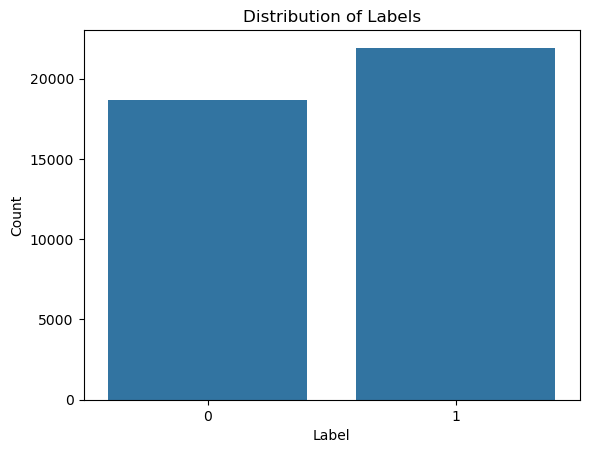

In [21]:
sns.countplot(data=df, x='label')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

## Word Frequency Plot for Titles or Text

In [22]:
import re

In [23]:
from collections import Counter

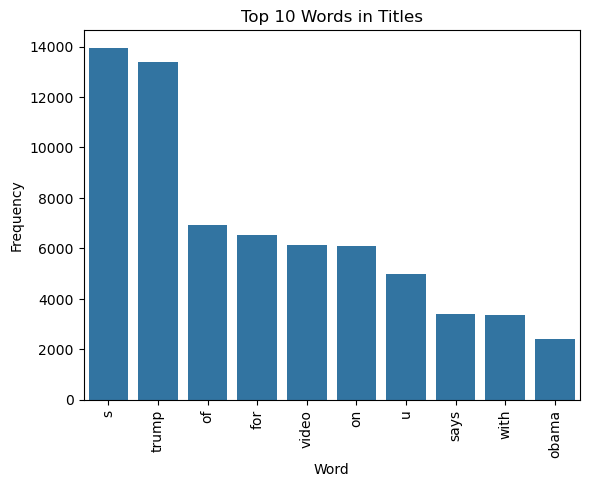

In [24]:
def preprocess_text(text):
    """
    Function to clean and tokenize text.

    Params:
        text: str

    Returns:
        list
    """
    text = re.sub(r'\W+', ' ', text)  # remove non-alphanumeric characters
    tokens = text.lower().split()     # lowercase and split into words
    stopwords = set(['the', 'a', 'and', 'is', 'to', 'in'])
    return [word for word in tokens if word not in stopwords]

# get word frequencies for titles
all_words = df['title'].dropna().apply(preprocess_text).sum()
word_counts = Counter(all_words).most_common(10)

# create a DataFrame for easy plotting
word_freq_df = pd.DataFrame(word_counts, columns=['word', 'frequency'])

# plot the top 10 most common words
sns.barplot(data=word_freq_df, x='word', y='frequency')
plt.title('Top 10 Words in Titles')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

## Top N-Grams Plot

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

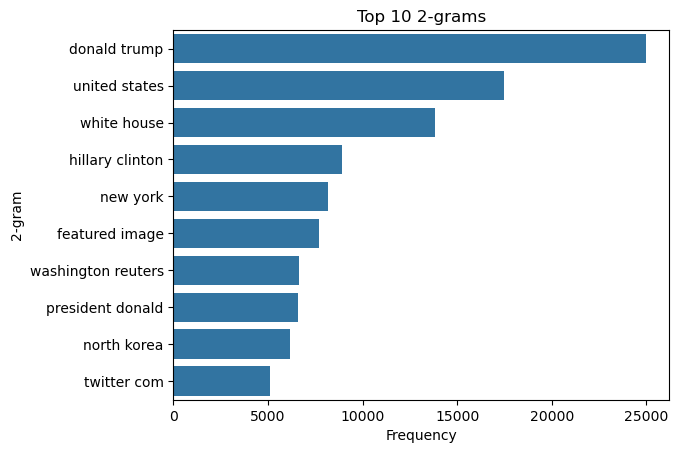

In [26]:
# function to extract and plot top n-grams
def plot_top_ngrams(text_data, n=2, top_n=10):
    """
    Function to extract and plot top n-grams.

    Params:
        text_data: str
        n: int, optional
        top_n: int, optional
    """
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vectorizer.fit_transform(text_data.dropna())
    ngram_counts = pd.DataFrame(ngrams.sum(axis=0), columns=vectorizer.get_feature_names_out(), index=['count']).T
    top_ngrams = ngram_counts.nlargest(top_n, 'count')
    
    # plot top n-grams
    sns.barplot(data=top_ngrams.reset_index(), x='count', y='index')
    plt.title(f'Top {top_n} {n}-grams')
    plt.xlabel('Frequency')
    plt.ylabel(f'{n}-gram')
    plt.show()

# plot top 2-grams for text column
plot_top_ngrams(df['text'], n=2, top_n=10)

## Text Length Distribution by Label

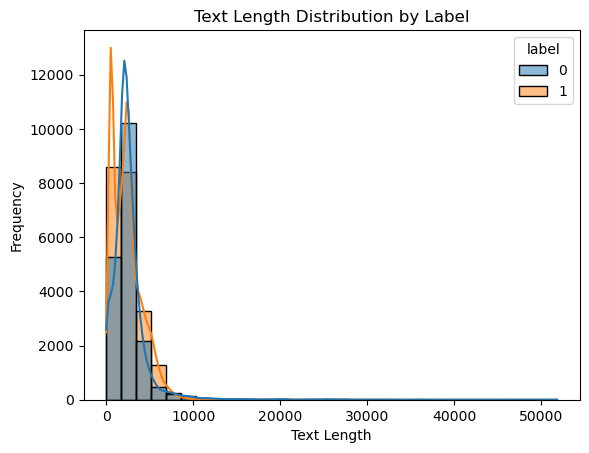

In [27]:
# calculate the length of each text entry
df['text_length'] = df['text'].apply(lambda x: len(str(x)))

# plot the distribution of text lengths by label
sns.histplot(data=df, x='text_length', hue='label', bins=30, kde=True)
plt.title('Text Length Distribution by Label')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

## TF-IDF Feature Visualization

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

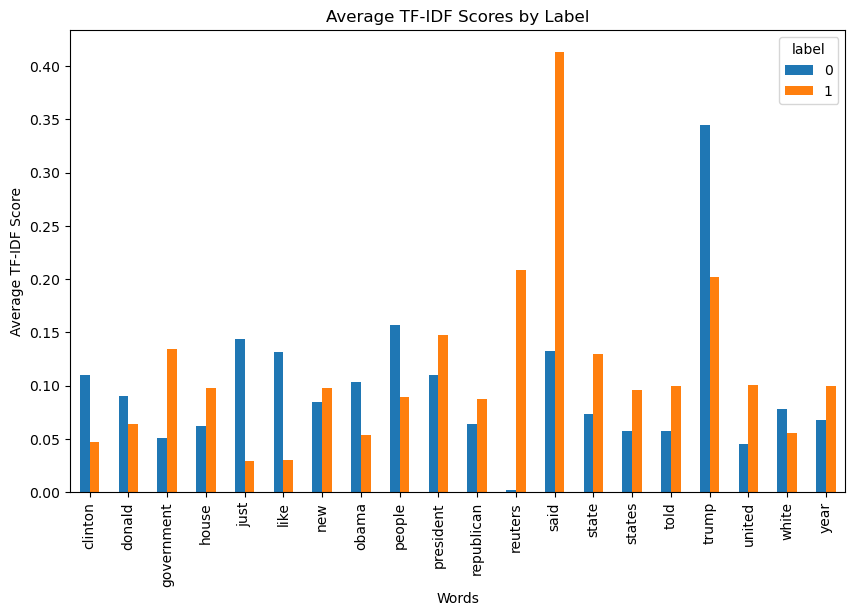

In [29]:
# vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=20)  # limit to 20 words for clarity
tfidf_matrix = tfidf.fit_transform(df['text'].fillna(''))
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# add label to the TF-IDF DataFrame
tfidf_df['label'] = df['label']

# plot average TF-IDF scores by label for the top words
tfidf_avg = tfidf_df.groupby('label').mean().T
tfidf_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Average TF-IDF Scores by Label')
plt.ylabel('Average TF-IDF Score')
plt.xlabel('Words')
plt.show()

## Text Embeddings Visualization with PCA or t-SNE

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
from sklearn.decomposition import PCA

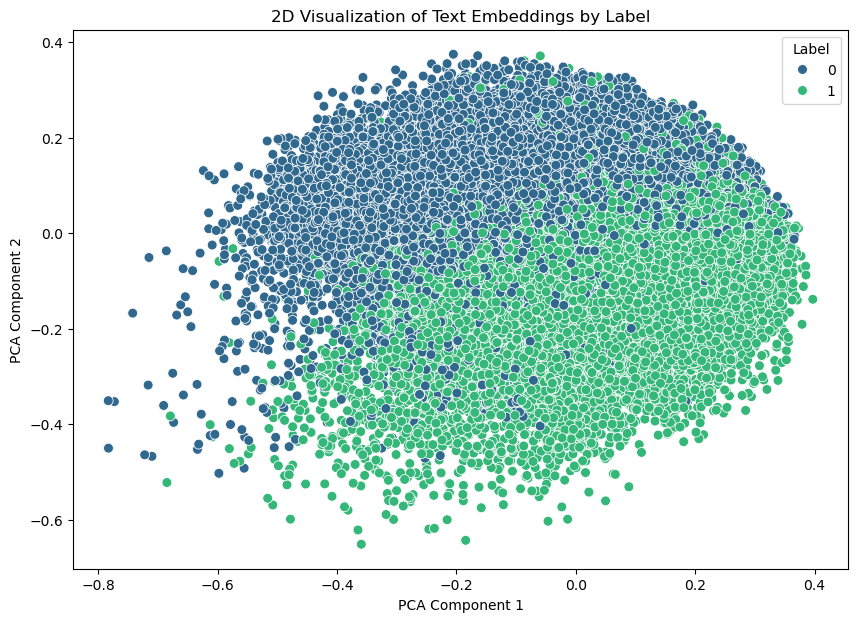

In [32]:
# use TF-IDF to create embeddings
tfidf = TfidfVectorizer(max_features=100)  # limit to 100 features for simplicity
tfidf_matrix = tfidf.fit_transform(df['text'].fillna(''))

# apply PCA to reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# create a scatter plot with PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['label'], palette="viridis", s=50)
plt.title('2D Visualization of Text Embeddings by Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Label')
plt.show()

## Word Cloud for Titles or Text by Label

In [33]:
!pip install wordcloud

In [34]:
from wordcloud import WordCloud

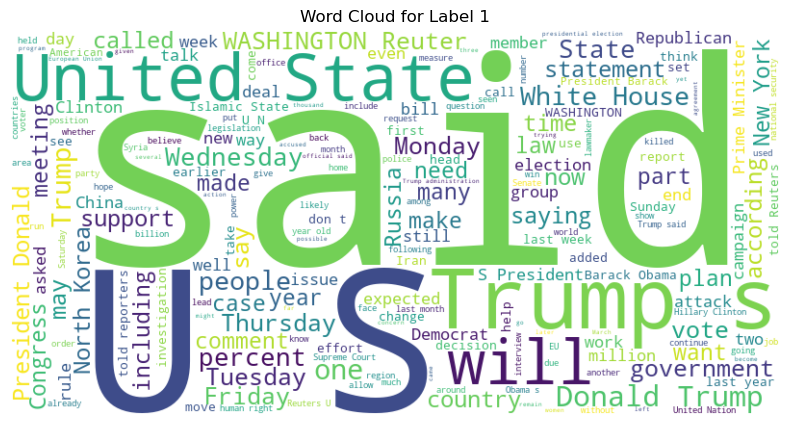

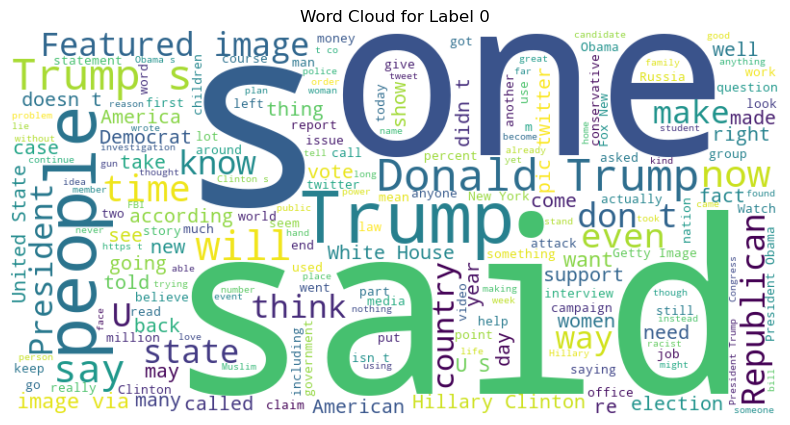

In [35]:
def plot_wordcloud(label):
    """
    Function to generate word cloud for a given label.

    Params:
        label: str
    """
    text = ' '.join(df[df['label'] == label]['text'].fillna('').tolist())
    wordcloud = WordCloud(width=800, 
                          height=400, 
                          background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Label {label}')
    plt.show()

# plot word clouds for each label
for label in df['label'].unique():
    plot_wordcloud(label)

## Sentiment Analysis

In [36]:
!pip install textblob

In [37]:
from textblob import TextBlob

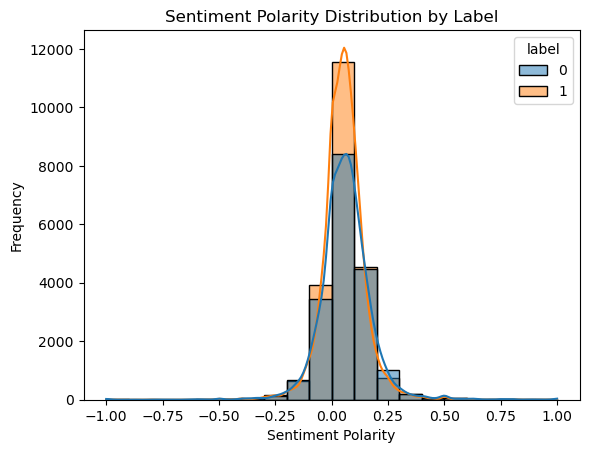

In [38]:
# calculate sentiment polarity for each text entry
df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# plot sentiment distribution
sns.histplot(data=df, 
             x='sentiment', 
             hue='label', 
             bins=20, 
             kde=True)
plt.title('Sentiment Polarity Distribution by Label')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

## Heatmap of Co-Occurrence for Common Words in Titles/Text

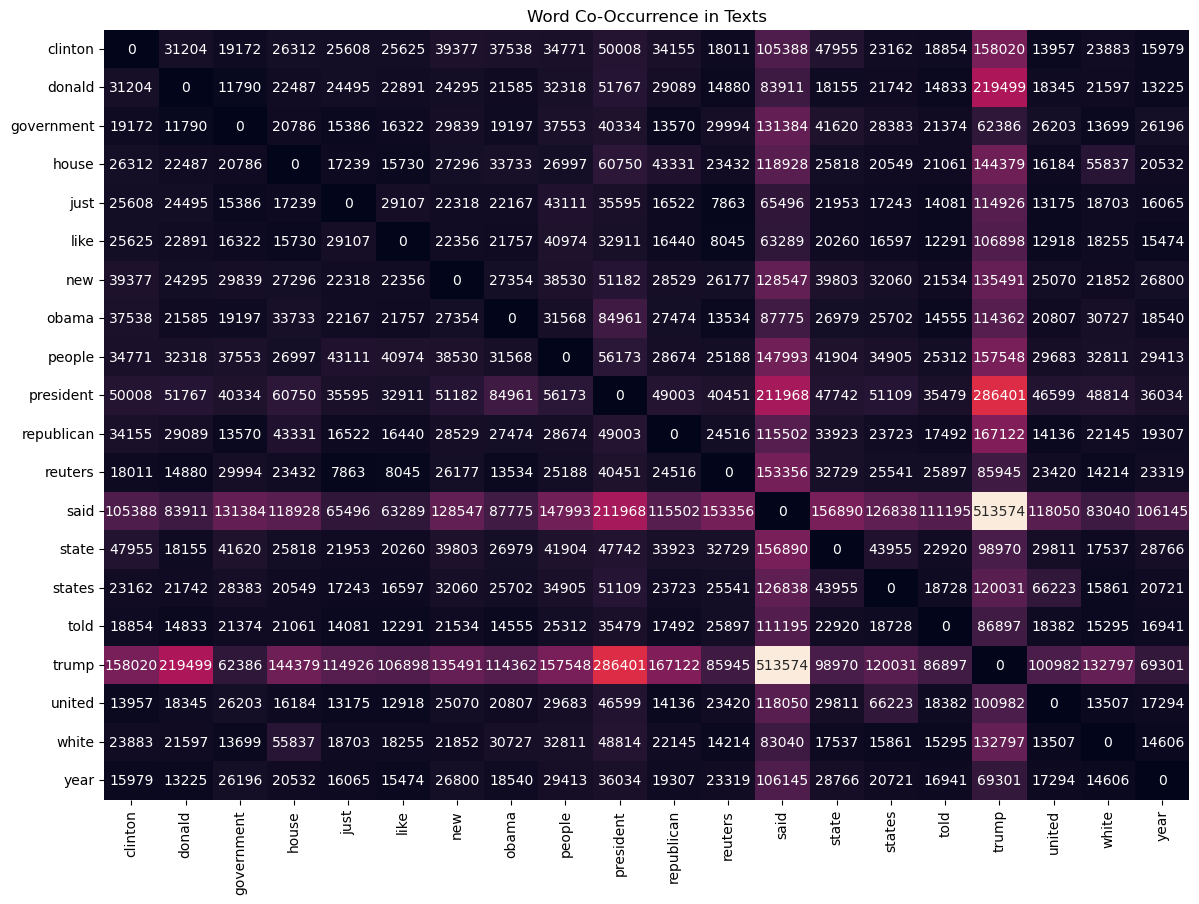

In [39]:
# initialize CountVectorizer to get word co-occurrence
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['text'].dropna())
word_cooccurrence = (X.T * X)  # multiply term-document matrix by its transpose to get co-occurrence
word_cooccurrence.setdiag(0)  # remove diagonal (self-co-occurrence)

# convert to DataFrame for heatmap
word_cooccurrence_df = pd.DataFrame(word_cooccurrence.toarray(), index=vectorizer.get_feature_names_out(), columns=vectorizer.get_feature_names_out())

# plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(data=word_cooccurrence_df, 
            annot=True,
            cbar=False,
            fmt='d')
plt.title('Word Co-Occurrence in Texts')
plt.show()

## Label-Based Comparison of Text Length vs. Word Count Scatter Plot

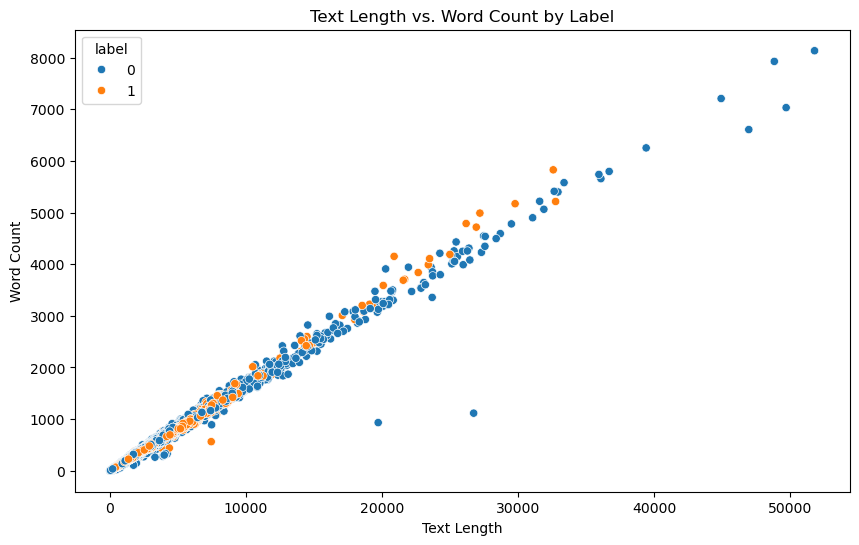

In [40]:
# calculate text length and word count
df['text_length'] = df['text'].apply(lambda x: len(str(x)))
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# scatter plot of text length vs. word count by label
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, 
                x='text_length', 
                y='word_count', 
                hue='label')
plt.title('Text Length vs. Word Count by Label')
plt.xlabel('Text Length')
plt.ylabel('Word Count')
plt.show()

## Bigrams or Trigrams by Label as a Heatmap

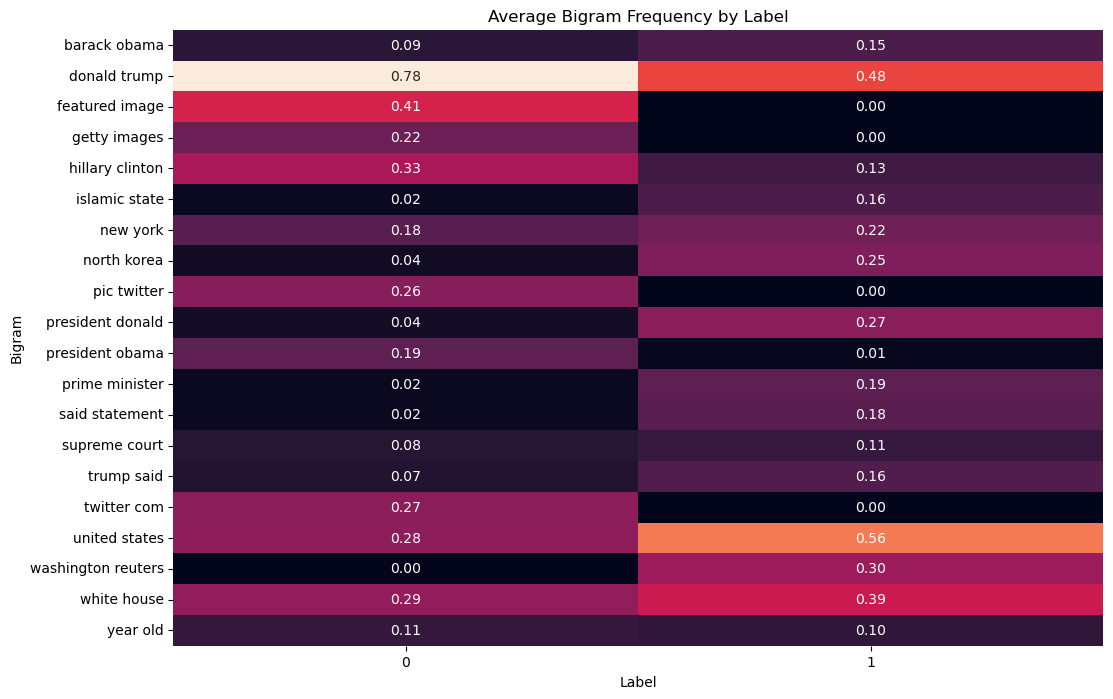

In [41]:
# extract bigrams (2-grams) for the text column
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['text'].fillna(''))

# create DataFrame of bigram counts
bigrams_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bigrams_df['label'] = df['label']

# calculate average bigram frequency for each label
bigrams_avg = bigrams_df.groupby('label').mean().T

# plot as heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data=bigrams_avg, 
            annot=True,
            cbar=False,
            fmt='.2f')
plt.title('Average Bigram Frequency by Label')
plt.xlabel('Label')
plt.ylabel('Bigram')
plt.show()

## Text Complexity Analysis

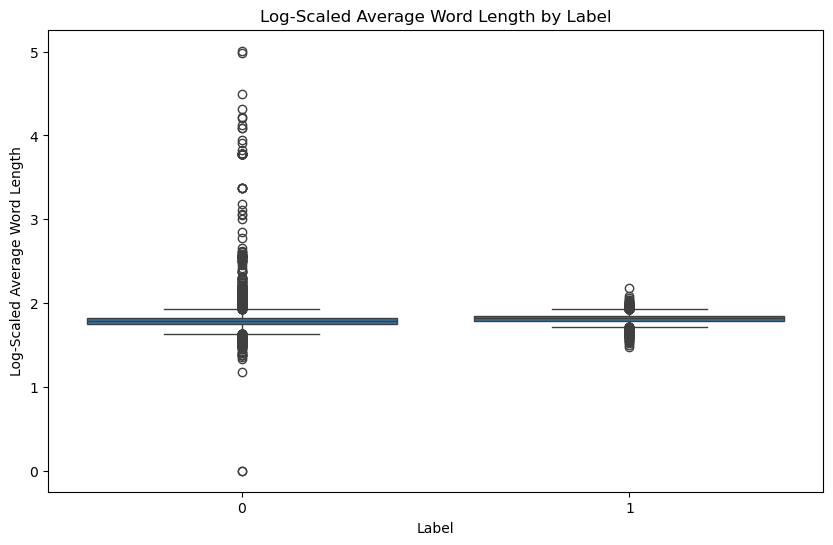

In [42]:
# calculate average word length with handling for empty or whitespace-only text entries
df['avg_word_length'] = df['text'].apply(lambda x: np.mean([len(word) for word in str(x).split()]) if x and len(str(x).split()) > 0 else 0)

# apply a log transformation to the average word length to manage skewness
df['log_avg_word_length'] = np.log1p(df['avg_word_length'])  # log1p handles zero values

# plot average word length by label with log scale
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='log_avg_word_length')
plt.title('Log-Scaled Average Word Length by Label')
plt.xlabel('Label')
plt.ylabel('Log-Scaled Average Word Length')
plt.show()

## Top Unique Words by Label with Bar Plot

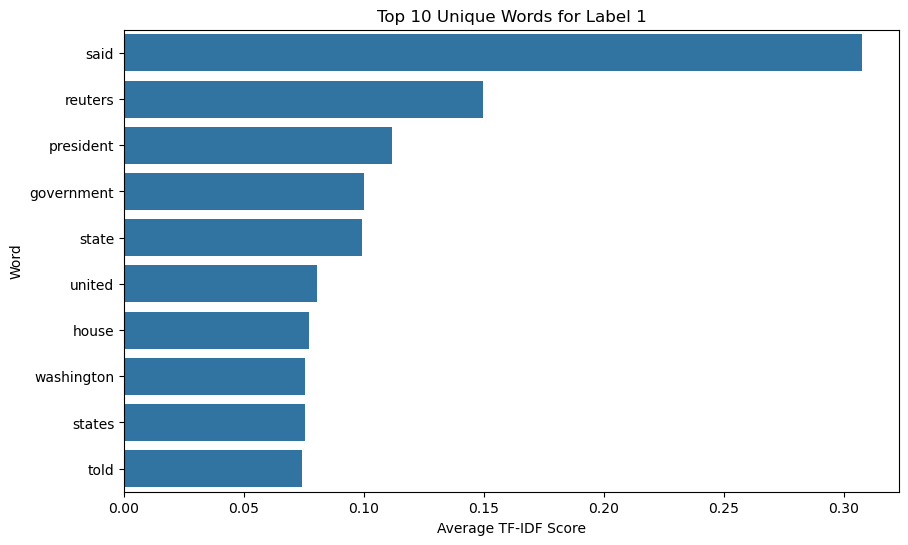

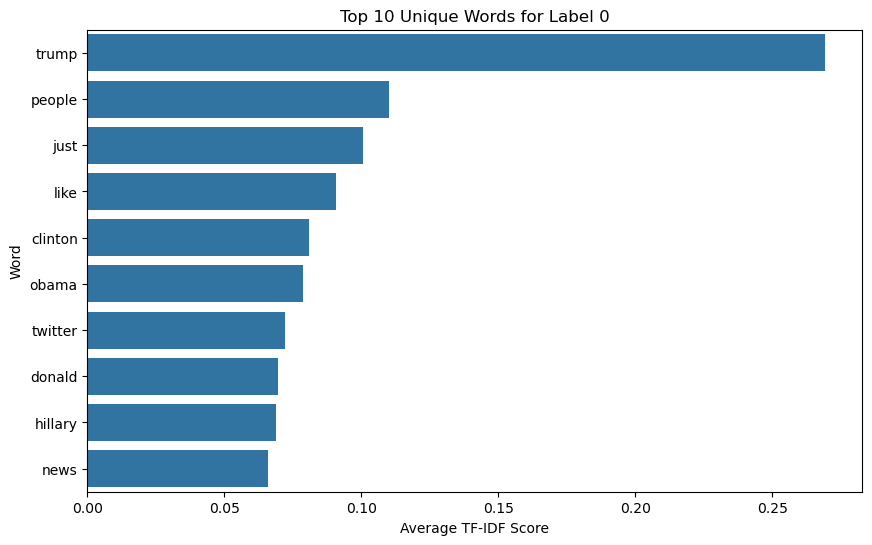

In [43]:
# create TF-IDF vectorizer and apply to the 'text' column
tfidf = TfidfVectorizer(stop_words='english', max_features=50)
tfidf_matrix = tfidf.fit_transform(df['text'].fillna(''))

# get TF-IDF values in a DataFrame with labels as columns
unique_words = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
unique_words['label'] = df['label']

# calculate average TF-IDF for each label
top_words_by_label = unique_words.groupby('label').mean().T
top_words_by_label['max_label'] = top_words_by_label.idxmax(axis=1)  # label with highest tf-idf for each word

# iterate over each label and plot the top 10 words unique to that label
for label in df['label'].unique():
    # filter the top 10 words for the current label
    top_words = top_words_by_label[top_words_by_label['max_label'] == label].nlargest(10, label)
    # create bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_words[label],
                y=top_words.index, 
                orient='h')
    plt.title(f'Top 10 Unique Words for Label {label}')
    plt.xlabel('Average TF-IDF Score')
    plt.ylabel('Word')
    plt.show()

## Stacked Bar Chart of Common Words by Label

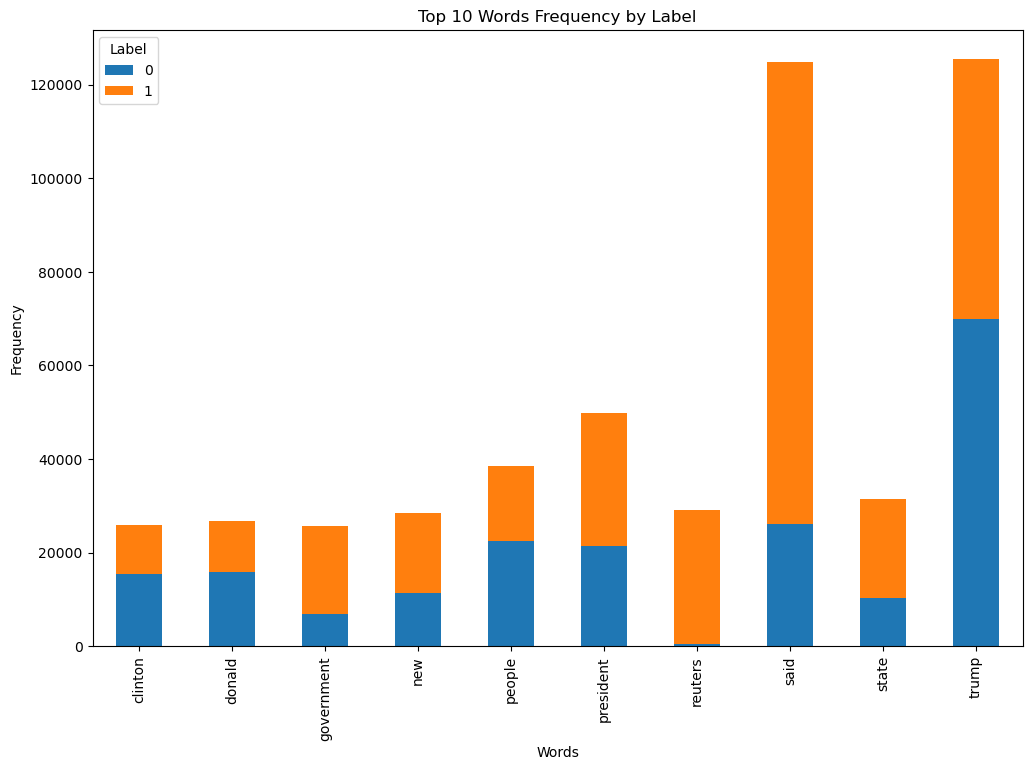

In [44]:
# extract the top words for analysis
vectorizer = CountVectorizer(stop_words='english', max_features=10)
X = vectorizer.fit_transform(df['text'].fillna(''))
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_counts['label'] = df['label']

# calculate word frequency by label
word_freq_by_label = word_counts.groupby('label').sum().T

# plot stacked bar chart
word_freq_by_label.plot(kind='bar', 
                        stacked=True, 
                        figsize=(12, 8))
plt.title('Top 10 Words Frequency by Label')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.legend(title='Label')
plt.show()

## Label Proportion Pie Chart

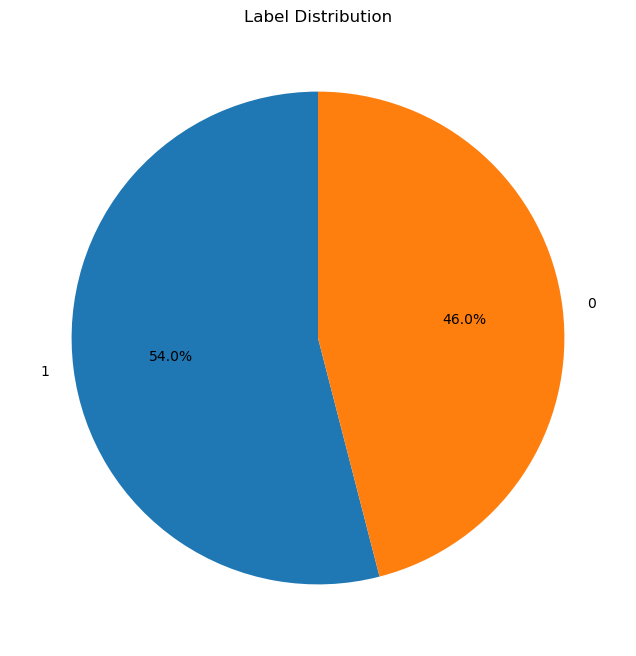

In [45]:
# plot label distribution as a pie chart
plt.figure(figsize=(8, 8))
df['label'].value_counts().plot.pie(autopct='%1.1f%%', 
                                    startangle=90)
plt.title('Label Distribution')
plt.ylabel('')
plt.show()

## Violin Plot of Word Count by Label

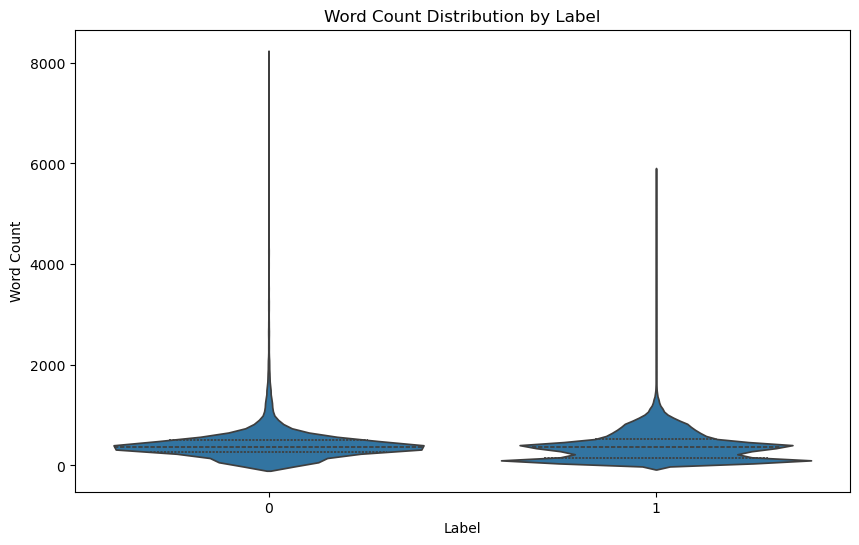

In [46]:
# calculate word count for each text entry
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# plot word count by label as a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='label', y='word_count', inner='quartile', density_norm='width')
plt.title('Word Count Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Word Count')
plt.show()

## Histogram of Sentence Count by Label

In [47]:
import nltk

In [48]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/kevinthomas/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [49]:
from nltk.tokenize import sent_tokenize

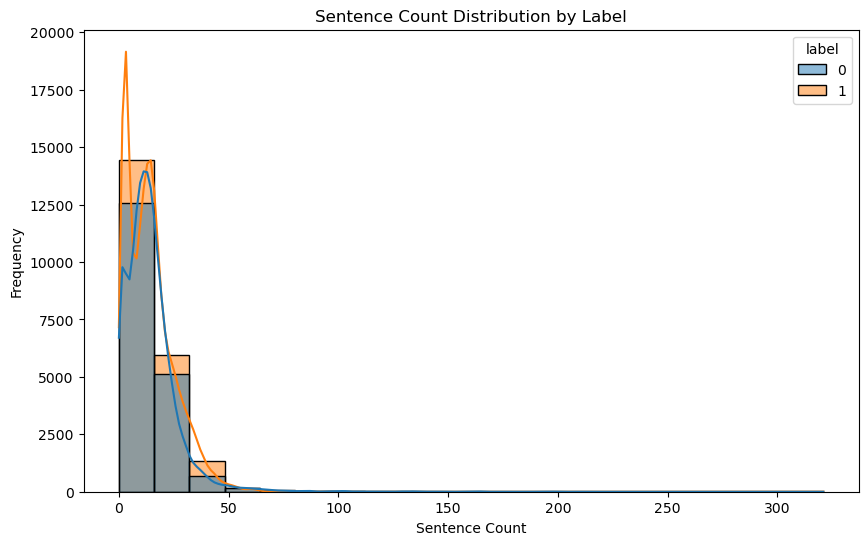

In [50]:
# calculate sentence count for each text entry
df['sentence_count'] = df['text'].apply(lambda x: len(sent_tokenize(str(x))))

# plot sentence count distribution by label
plt.figure(figsize=(10, 6))
sns.histplot(data=df, 
             x='sentence_count', 
             hue='label', 
             bins=20, 
             kde=True)
plt.title('Sentence Count Distribution by Label')
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')
plt.show()

## Box Plot of Sentiment Polarity by Label

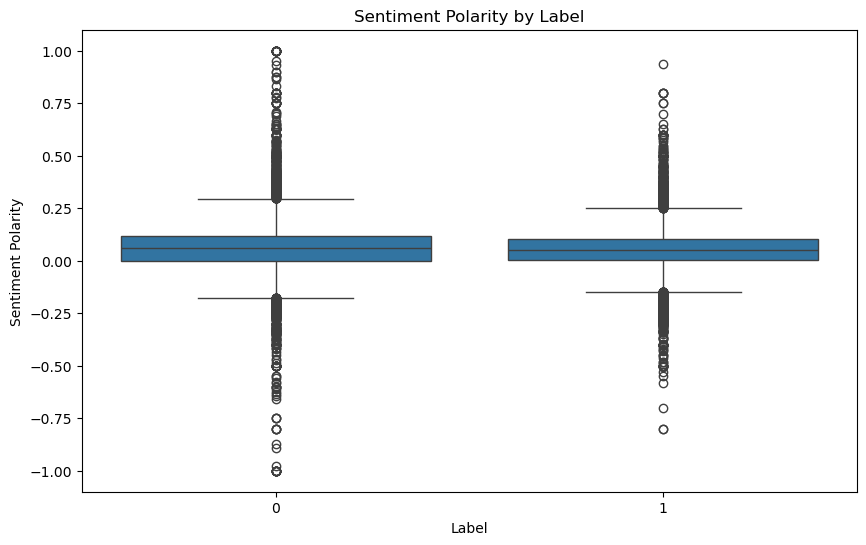

In [51]:
# calculate sentiment polarity for each text entry
df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# plot sentiment polarity by label
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='sentiment')
plt.title('Sentiment Polarity by Label')
plt.xlabel('Label')
plt.ylabel('Sentiment Polarity')
plt.show()

## Sankey Diagram of Bigram Transitions

In [52]:
import plotly.graph_objects as go

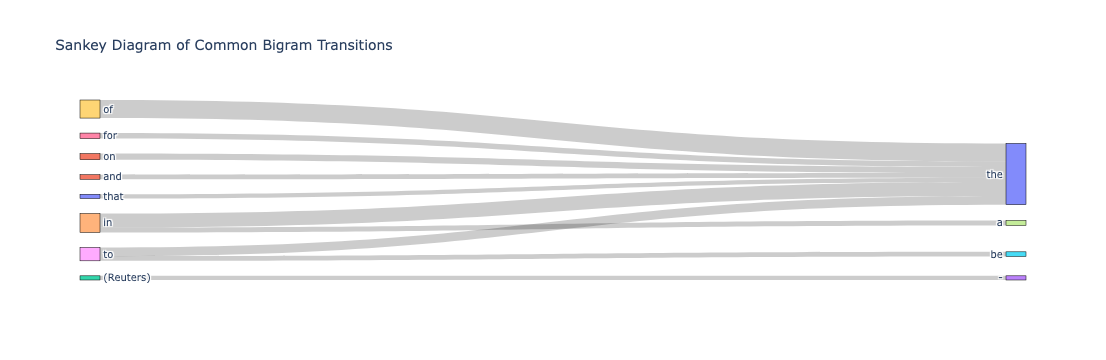

In [53]:
# extract bigrams
bigrams = [tuple(bigram) for text in df['text'].fillna('') for bigram in zip(text.split()[:-1], text.split()[1:])]
bigram_counts = Counter(bigrams).most_common(10)

# create DataFrame for Sankey data
sankey_df = pd.DataFrame(bigram_counts, columns=['bigram', 'count'])
sankey_df[['source', 'target']] = pd.DataFrame(sankey_df['bigram'].tolist(), index=sankey_df.index)

# get unique labels for nodes and map them to indices
all_nodes = list(set(sankey_df['source']).union(set(sankey_df['target'])))
node_map = {node: idx for idx, node in enumerate(all_nodes)}

# create source, target, and value lists for Sankey diagram
sources = sankey_df['source'].map(node_map).tolist()
targets = sankey_df['target'].map(node_map).tolist()
values = sankey_df['count'].tolist()

# create Sankey diagram using plotly.graph_objects
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes,
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

# add title and show figure
fig.update_layout(title_text="Sankey Diagram of Common Bigram Transitions", font_size=10)
fig.show()

## Term Frequency-Inverse Document Frequency (TF-IDF) Heatmap

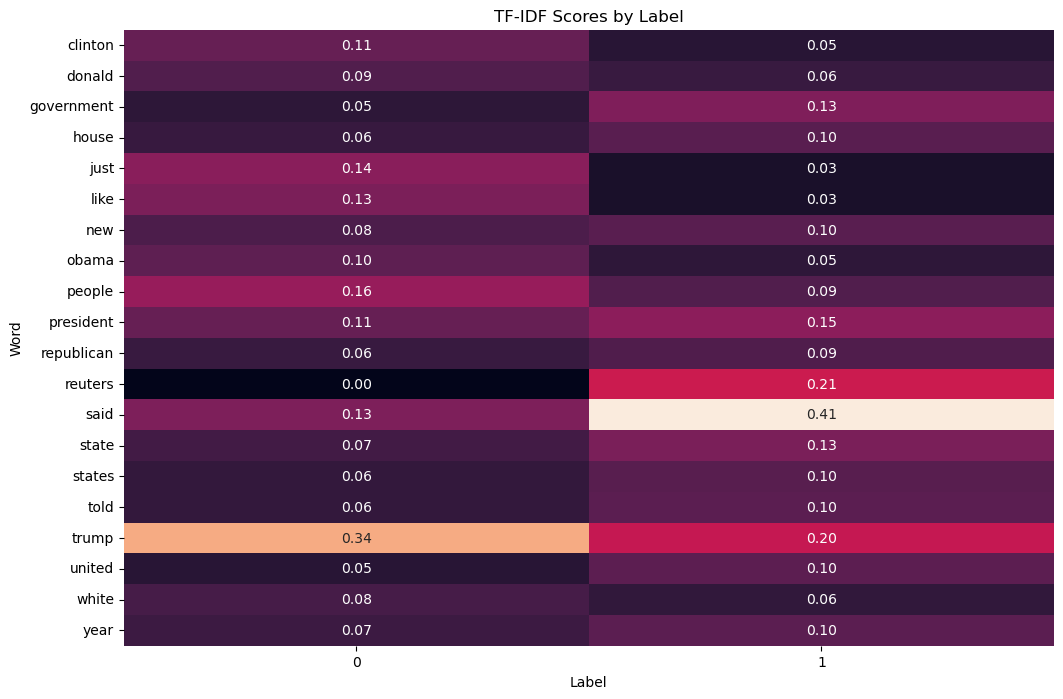

In [54]:
# create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_matrix = tfidf.fit_transform(df['text'].fillna(''))
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df['label'] = df['label']

# calculate mean TF-IDF score for each word by label
tfidf_mean = tfidf_df.groupby('label').mean().T

# plot heatmap of TF-IDF scores
plt.figure(figsize=(12, 8))
sns.heatmap(data=tfidf_mean, 
            annot=True, 
            cbar=False,
            fmt='.2f')
plt.title('TF-IDF Scores by Label')
plt.xlabel('Label')
plt.ylabel('Word')
plt.show()

## Radar Chart of Text Features by Label

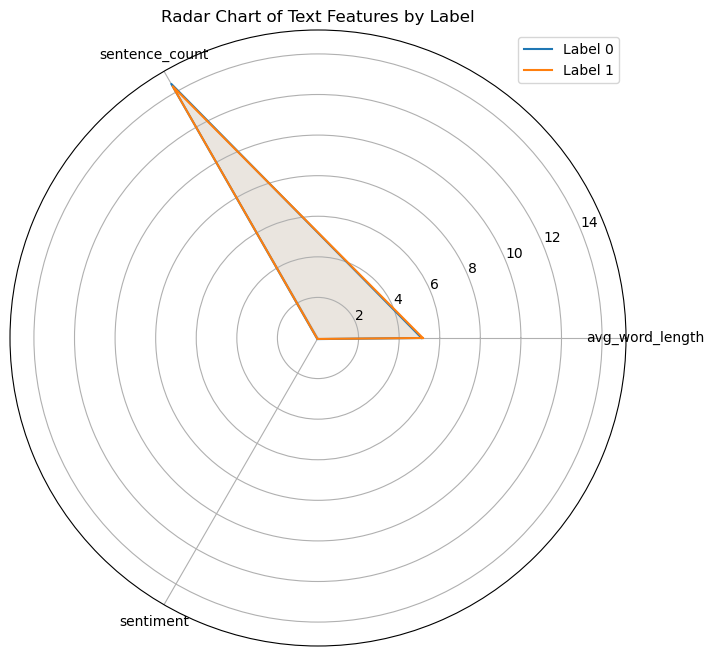

In [55]:
# calculate text metrics with handling for empty or missing values
df['avg_word_length'] = df['text'].apply(lambda x: np.mean([len(word) for word in str(x).split()]) if x and len(str(x).split()) > 0 else 0)
df['sentence_count'] = df['text'].apply(lambda x: len(TextBlob(str(x)).sentences) if x else 0)
df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity if x else 0)

# aggregate metrics by label, filling in any NaN values with 0
radar_data = df.groupby('label')[['avg_word_length', 
                                  'sentence_count', 
                                  'sentiment']].mean().fillna(0)

# create radar chart
categories = list(radar_data.columns)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# iterate through radar_data to plot each label
for i, row in radar_data.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]  # close the loop
    angles = [n / float(len(categories)) * 2 * np.pi for n in range(len(categories))]
    angles += angles[:1]
    
    # plot each label's values
    ax.plot(angles, values, label=f'Label {i}')
    ax.fill(angles, values, alpha=0.1)

# set category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# add title and legend
plt.title('Radar Chart of Text Features by Label')
plt.legend(loc='upper right')
plt.show()

## PCA or t-SNE Plot for Text Embeddings

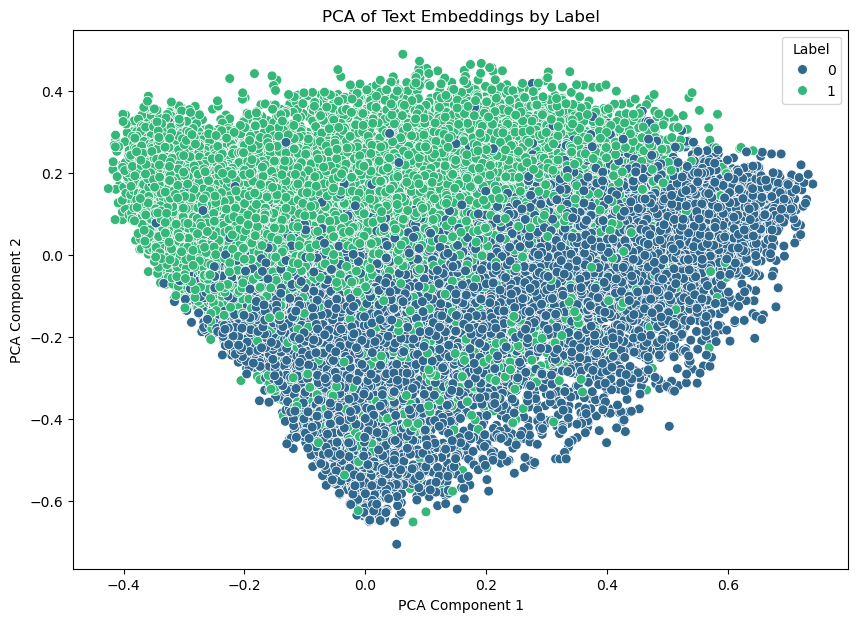

In [56]:
# create TF-IDF embeddings
tfidf = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = tfidf.fit_transform(df['text'].fillna(''))

# apply PCA to reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# create scatter plot of PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['label'], palette="viridis", s=50)
plt.title('PCA of Text Embeddings by Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Label')
plt.show()

## Heatmap of Average Sentiment and Word Count by Label

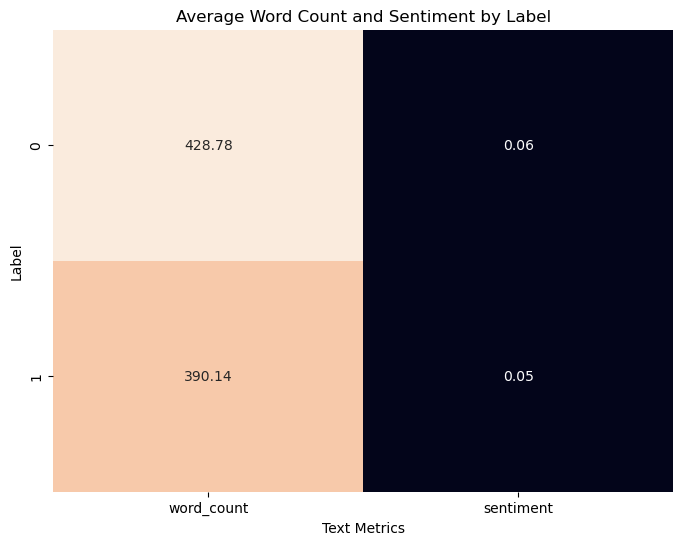

In [57]:
# calculate word count and sentiment polarity if not already calculated
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# aggregate mean values for word count and sentiment by label
heatmap_data = df.groupby('label')[['word_count', 'sentiment']].mean()

# plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data=heatmap_data, 
            annot=True, 
            cbar=False, 
            fmt='.2f')
plt.title('Average Word Count and Sentiment by Label')
plt.xlabel('Text Metrics')
plt.ylabel('Label')
plt.show()

## Length vs. Sentiment Scatter Plot by Label

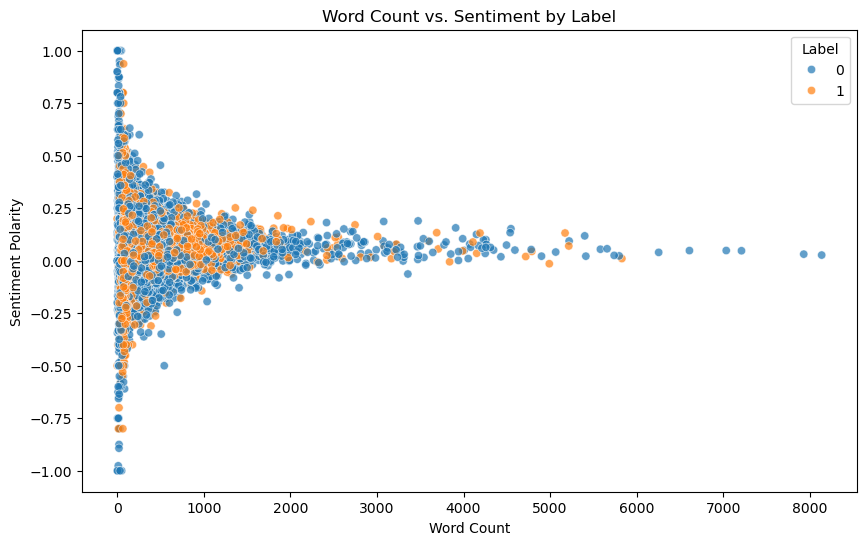

In [58]:
# scatter plot of word count vs. sentiment by label
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, 
                x='word_count', 
                y='sentiment', 
                hue='label', 
                alpha=0.7)
plt.title('Word Count vs. Sentiment by Label')
plt.xlabel('Word Count')
plt.ylabel('Sentiment Polarity')
plt.legend(title='Label')
plt.show()

## Density Plot of Sentence Length Distribution by Label

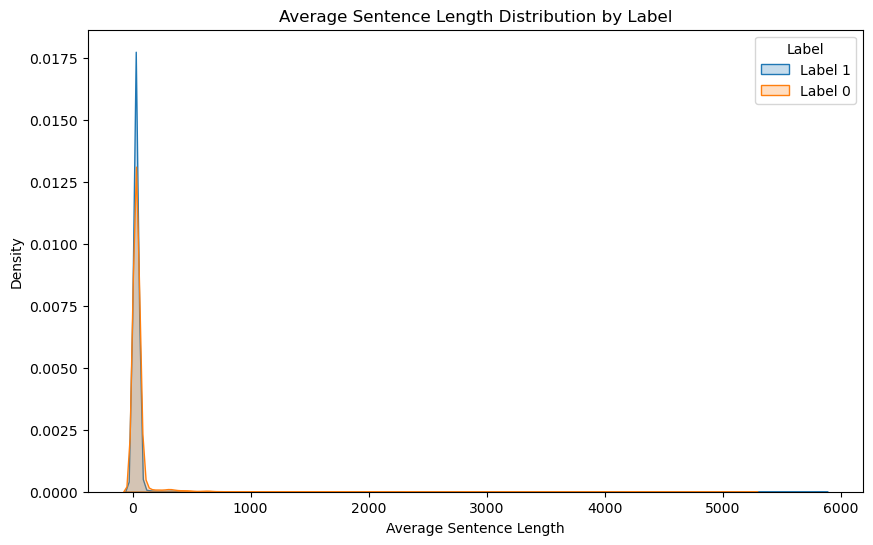

In [59]:
# calculate average sentence length with handling for empty or missing text entries
df['avg_sentence_length'] = df['text'].apply(lambda x: np.mean([len(sentence.split()) for sentence in TextBlob(str(x)).sentences]) if x and len(TextBlob(str(x)).sentences) > 0 else 0)

# density plot of average sentence length by label
plt.figure(figsize=(10, 6))
for label in df['label'].unique():
    subset = df[df['label'] == label]
    sns.kdeplot(subset['avg_sentence_length'], label=f'Label {label}', fill=True)

plt.title('Average Sentence Length Distribution by Label')
plt.xlabel('Average Sentence Length')
plt.ylabel('Density')
plt.legend(title='Label')
plt.show()

## Donut Chart of Label Distribution

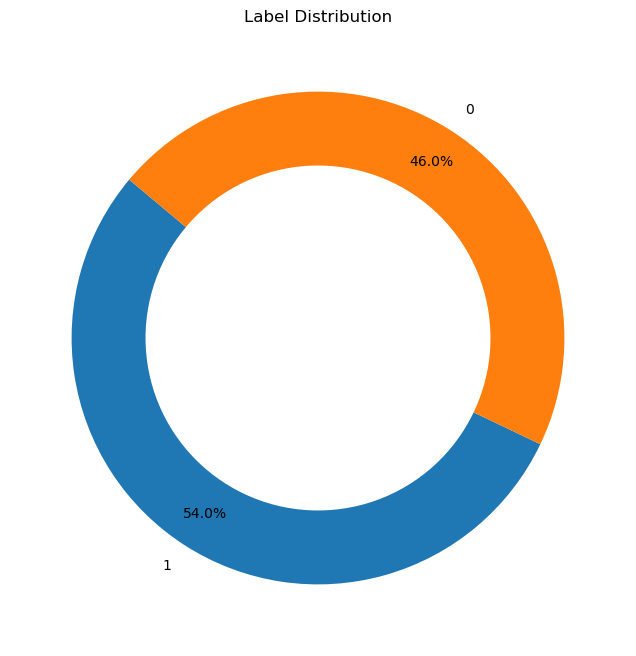

In [60]:
# calculate label distribution
label_counts = df['label'].value_counts()

# plot donut chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts,  # Pass label_counts as the first argument
        labels=label_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        pctdistance=0.85)

# add center circle to create the donut effect
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# set title and display plot
plt.title('Label Distribution')
plt.show()

## Correlation Matrix of Text Features

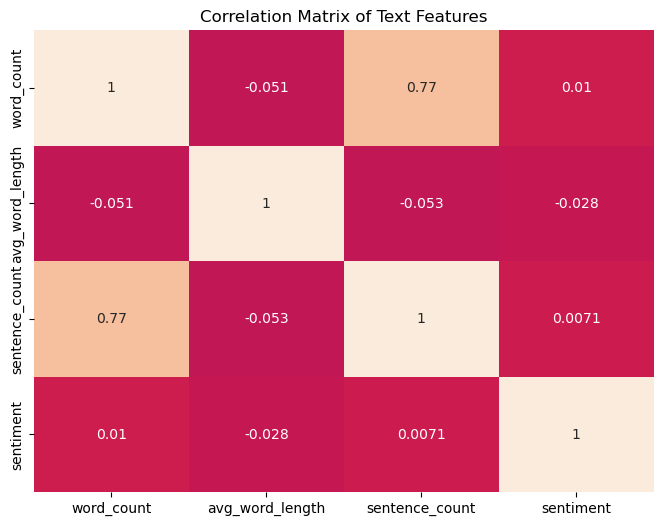

In [61]:
# calculate correlation matrix of text features
correlation_data = df[['word_count', 
                       'avg_word_length', 
                       'sentence_count', 
                       'sentiment']].corr()

# plot correlation matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data=correlation_data, 
            annot=True, 
            cbar=False, 
            vmin=-1, 
            vmax=1)
plt.title('Correlation Matrix of Text Features')
plt.show()

## Neural Network

In [62]:
!pip install torch

In [63]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score
from torch.utils.data import DataLoader, TensorDataset
from sklearn.feature_extraction.text import TfidfVectorizer

### Step 1: Device Selection (CPU, CUDA, or MPS)

In [64]:
# device selection: MPS (for macOS with Apple Silicon), CUDA, or CPU
device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using Device: {device}')

Using Device: mps


### Step 2: Define the Neural Network Model

In [65]:
class FakeNewsBinaryClassifier(nn.Module):
    """
    A binary classification neural network model for fake news detection.
    This model is designed for binary classification tasks, predicting whether
    an article is true or false based on its title and text content. It consists 
    of three fully connected layers with ReLU activations and a final Sigmoid activation
    to output probabilities between 0 and 1.
    """

    def __init__(self, input_dim):
        """
        Initializes the FakeNewsBinaryClassifier model with the specified input dimensions.

        Params:
            input_dim: int
        """
        super(FakeNewsBinaryClassifier, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_dim, 128),
                                     nn.ReLU(),
                                     nn.Linear(128, 64),
                                     nn.ReLU(),
                                     nn.Linear(64, 1),
                                     nn.Sigmoid())

    def forward(self, x):
        """
        Defines the forward pass of the model.

        Params:
            x: torch.Tensor

        Returns:
            torch.Tensor
        """
        return self.network(x)

### Step 3: Update the Code to Use the Selected Device

In [66]:
# combine title and text columns, then vectorize them
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['title'] + " " + df['text']).toarray()
y = df['label'].values  # labels for training

# convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# move tensors to the selected device
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

# parameters
num_epochs = 5
kf = KFold(n_splits=5, shuffle=True, random_state=101)
fold_results = []
best_accuracy = 0
best_auc = 0  # initialize best AUC score
best_model_state = None  # initialize to store the best model state

# 5-Fold Cross-Validation
for fold, (train_idx, val_idx) in enumerate(kf.split(X_tensor)):
    print(f"Fold {fold+1}")
    
    # split data for this fold
    X_train, X_val = X_tensor[train_idx], X_tensor[val_idx]
    y_train, y_val = y_tensor[train_idx], y_tensor[val_idx]
    
    # DataLoader for the current fold
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
    
    # initialize model, loss function, and optimizer for each fold
    model = FakeNewsBinaryClassifier(input_dim=1000).to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # training loop for each fold
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # move inputs and labels to device
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')
    
    # evaluate on the validation set
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_preds = (val_outputs >= 0.5).float()
        
        # calculate metrics for the current fold
        accuracy = accuracy_score(y_val.cpu(), val_preds.cpu())
        auc = roc_auc_score(y_val.cpu(), val_outputs.cpu())
        print(f'Fold {fold+1} Accuracy: {accuracy:.4f}, AUC: {auc:.4f}')
        
        # store results for this fold
        fold_results.append((accuracy, auc))
        
        # save the model if it's the best based on AUC
        if auc > best_auc:
            best_accuracy = accuracy
            best_auc = auc
            best_model_state = model.state_dict()  # save the best model's state_dict

Fold 1
Epoch 1/5, Loss: 0.0002
Epoch 2/5, Loss: 0.0009
Epoch 3/5, Loss: 0.0121
Epoch 4/5, Loss: 0.0000
Epoch 5/5, Loss: 0.0003
Fold 1 Accuracy: 0.9755, AUC: 0.9960
Fold 2
Epoch 1/5, Loss: 0.0302
Epoch 2/5, Loss: 0.0001
Epoch 3/5, Loss: 0.0931
Epoch 4/5, Loss: 0.0005
Epoch 5/5, Loss: -0.0000
Fold 2 Accuracy: 0.9733, AUC: 0.9950
Fold 3
Epoch 1/5, Loss: 0.0012
Epoch 2/5, Loss: 0.0007
Epoch 3/5, Loss: 0.0082
Epoch 4/5, Loss: 0.0008
Epoch 5/5, Loss: 0.0012
Fold 3 Accuracy: 0.9709, AUC: 0.9951
Fold 4
Epoch 1/5, Loss: 0.0905
Epoch 2/5, Loss: 0.0122
Epoch 3/5, Loss: 0.0013
Epoch 4/5, Loss: 0.0000
Epoch 5/5, Loss: 0.0000
Fold 4 Accuracy: 0.9746, AUC: 0.9962
Fold 5
Epoch 1/5, Loss: 0.0028
Epoch 2/5, Loss: 0.0006
Epoch 3/5, Loss: 0.0023
Epoch 4/5, Loss: 0.0151
Epoch 5/5, Loss: 0.0000
Fold 5 Accuracy: 0.9779, AUC: 0.9965


### Step 4: Report Cross-Validation Results

In [67]:
# calculate average metrics across all folds
average_accuracy = np.mean([result[0] for result in fold_results])
average_auc = np.mean([result[1] for result in fold_results])

# provide results
print(f'5-Fold Cross-Validation Results')
print(f'Average Accuracy: {average_accuracy:.4f}')
print(f'Average AUC: {average_auc:.4f}')

5-Fold Cross-Validation Results
Average Accuracy: 0.9744
Average AUC: 0.9957


### Step 5: Save and Load the Model

In [69]:
# after cross-validation, save the best model
if best_model_state is not None:
    torch.save(best_model_state, 'fake_news_classifier.pth')
    print(f'Best Model w/ Accuracy: {best_accuracy:.4f}, AUC: {best_auc:.4f}')

# load the model for inference
loaded_model = FakeNewsBinaryClassifier(input_dim=1000).to(device)
loaded_model.load_state_dict(torch.load('fake_news_classifier.pth', weights_only=True))
loaded_model.eval()

Best Model w/ Accuracy: 0.0000, AUC: 0.9965


FakeNewsBinaryClassifier(
  (network): Sequential(
    (0): Linear(in_features=1000, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

### Step 6: Inference on New, Unlabeled Data

In [70]:
def predict(model, X):
    """
    Generates a binary prediction ('True' or 'False') for the input data using the specified model.

    Params:
        model: torch.nn.Module
        X: torch.Tensor

    Returns:
        str
    """
    with torch.no_grad():
        output = model(X)
        prediction = (output >= 0.5).float()
    return 'True' if prediction.item() == 1 else 'False'

In [71]:
# new article for inference (no label)
sample_title = 'Palestinians switch off Christmas lights in Bethlehem in anti-Trump protest.'
sample_text = 'RAMALLAH, West Bank (Reuters) - Palestinians switched off Christmas lights at Jesus traditional birthplace.'

# combine and vectorize, then move to device
sample_combined = sample_title + ' ' + sample_text
sample_vector = vectorizer.transform([sample_combined]).toarray()
sample_tensor = torch.tensor(sample_vector, dtype=torch.float32).to(device)

# run inference
print("Prediction:", predict(loaded_model, sample_tensor))

Prediction: True
